In [56]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
font = {'family' : 'normal',
        'size'   : 22}
mpl.rc('font', **font)

In [39]:
dfmasc = pd.read_csv("./bases/suicide/suicidioMasculino.csv")

In [42]:
dfreg = pd.read_csv("./bases/wdi/Country.csv")

In [7]:
df = pd.read_csv("./bases/education/EdStatsAjustado.csv")

In [45]:
dfregmerge = dfreg[['CountryCode','Region','IncomeGroup']].copy()
dfregmerge.rename(columns={'CountryCode':'countrycode','Region':'region','IncomeGroup':'incomegroup'},inplace=True)

In [33]:
dfx = df[df.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
dfx = dfx[["CountryCode","Year","Value"]].reset_index(drop=True)
dfx.rename(columns={'CountryCode':'countrycode','Year':'year','Value':'value'},inplace=True)

,countrycode,year,value
0,ALB,2000,4026.537422
1,ATG,2000,14987.411027
2,ARG,2000,11810.061364
3,ARM,2000,2318.238073
4,ABW,2000,NaN
5,AUS,2000,26406.130951
6,AUT,2000,29357.485725
7,BHS,2000,20487.343180
8,BHR,2000,35622.601699
9,BRB,2000,12275.054497


In [40]:
dfmasc = dfmasc.join(dfx.set_index(['countrycode','year']), on=['countrycode','year'])

,country,year,suicidio514,suicidio1524,suicidio2534,suicidio3554,suicidio5574,suicidio75,countrycode,value
0,Albania,2000,0.266738,2.083333,7.327586,1.067521,5.636979,4.016064,ALB,4026.537422
1,Albania,2001,1.865927,3.905655,10.654579,8.975097,5.593126,3.221234,ALB,4463.632986
2,Albania,2002,0.313015,5.701969,11.149569,9.158971,6.561349,12.900313,ALB,4754.675856
3,Albania,2003,1.277123,5.489780,4.380990,7.250205,7.939659,3.061193,ALB,5114.784779
4,Albania,2004,0.330927,6.625565,7.845522,9.954897,4.826208,11.259359,ALB,5524.921661
5,Albania,2005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,5942.870083
6,Albania,2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,6634.779222
7,Albania,2007,1.467906,4.508426,5.217573,7.659273,6.245539,18.883067,ALB,7289.632366
8,Albania,2008,2.667032,3.836736,12.148911,9.811227,9.183459,4.486921,ALB,8228.357428
9,Albania,2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,8823.802984


In [51]:
dfmasc.rename(columns={'value':'gdp'}, inplace=True)

In [66]:
df2 = pd.merge(dfmasc, dfregmerge, on='countrycode')
df2 = df2.replace({'East Asia & Pacific':0,'Europe & Central Asia':1,
       'Latin America & Caribbean':2, 'Middle East & North Africa':3,
       'North America':4, 'Sub-Saharan Africa':5})
df2['region'] = pd.to_numeric(df2['region'])


,country,year,suicidio514,suicidio1524,suicidio2534,suicidio3554,suicidio5574,suicidio75,countrycode,gdp,region,incomegroup
0,Albania,2000,0.266738,2.083333,7.327586,1.067521,5.636979,4.016064,ALB,4026.537422,1,Upper middle income
1,Albania,2001,1.865927,3.905655,10.654579,8.975097,5.593126,3.221234,ALB,4463.632986,1,Upper middle income
2,Albania,2002,0.313015,5.701969,11.149569,9.158971,6.561349,12.900313,ALB,4754.675856,1,Upper middle income
3,Albania,2003,1.277123,5.489780,4.380990,7.250205,7.939659,3.061193,ALB,5114.784779,1,Upper middle income
4,Albania,2004,0.330927,6.625565,7.845522,9.954897,4.826208,11.259359,ALB,5524.921661,1,Upper middle income
5,Albania,2005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,5942.870083,1,Upper middle income
6,Albania,2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,6634.779222,1,Upper middle income
7,Albania,2007,1.467906,4.508426,5.217573,7.659273,6.245539,18.883067,ALB,7289.632366,1,Upper middle income
8,Albania,2008,2.667032,3.836736,12.148911,9.811227,9.183459,4.486921,ALB,8228.357428,1,Upper middle income
9,Albania,2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALB,8823.802984,1,Upper middle income


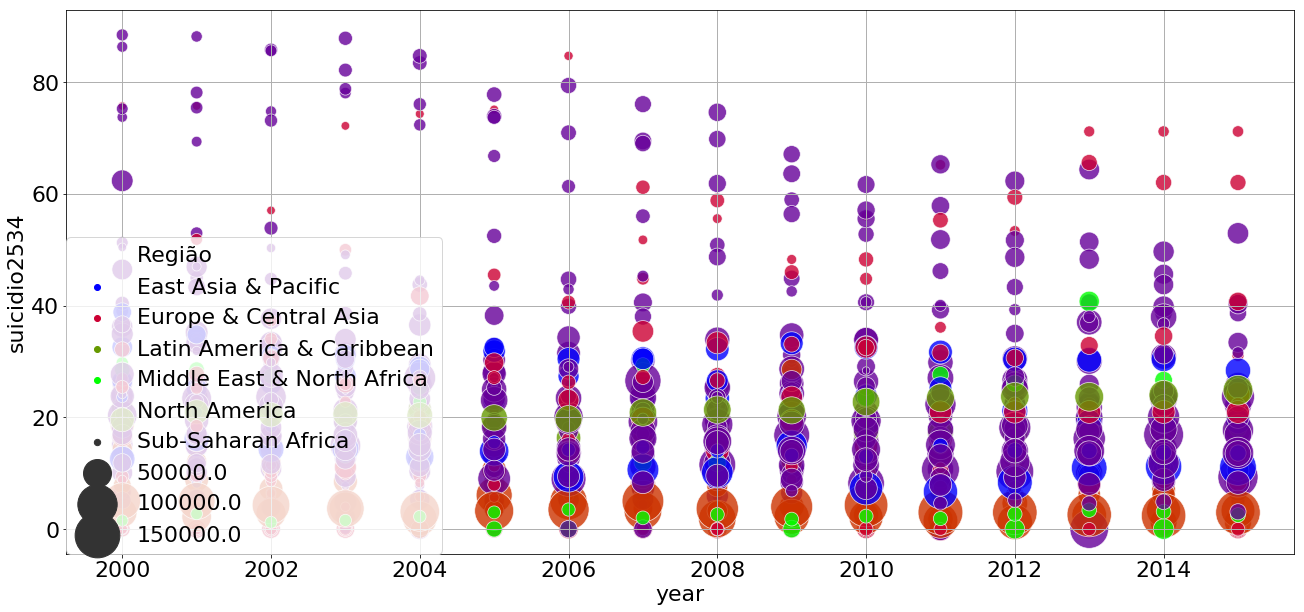

In [142]:
fig, ax = plt.subplots(figsize=(22, 10))
# add stripplot to boxplot with Seaborn
bplot=sns.scatterplot(y='suicidio2534', x='year', size='gdp', hue='region',
                   data=df2, 
                   alpha=0.8, palette="brg",sizes=(40, 2000))
ax.grid(b=True, which='major', linewidth=1)
plt.legend(loc=3, borderaxespad=0.)
legend = bplot.legend_
#ax.legend(markerscale=3)
# Set legend title
legend.get_texts()[0].set_text('Região')

labels= ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'Sub-Saharan Africa']

# Set legend labels
for i, label in enumerate(labels):
    # i+1 because i=0 is the title, and i starts at 0
    legend.get_texts()[i+1].set_text(label)